In [2]:
cd(@__DIR__)
include(raw"utils\utils.jl")

MAPE (generic function with 2 methods)

Making a calendar of 100 years

In [1]:
try 
    using Dates
catch ; 
    import Pkg
    Pkg.add("Dates")
    using Dates
end
k=100
DatesRange=collect(Date(1900):Day(1):Date(1900+k))
N=length(DatesRange)

36525

# AR model on the whole series

## AR(1)

In [6]:
x0=-3.
Φ,σ=0.6,6

(0.6, 6)

In [7]:
include("utils/Simulation.jl")
x=[x0 ; simulation(x0,Φ,σ,N-length(x0))]

36525-element Vector{Float64}:
  -3.0
  -6.404729068480249
   2.814197588050616
  -2.335156748832711
  -1.7817196020002137
  -3.38837555882782
   6.090932728675805
  -3.9257895687168864
  -4.580105459555776
  -1.0163277991260204
   ⋮
   0.661987237857506
   1.8979377505247754
  10.15698629759441
  -2.6191172966548617
  13.466724249066406
  -0.7817002455822699
   4.6638337182726595
  -1.851621886335256
 -13.866431946645854

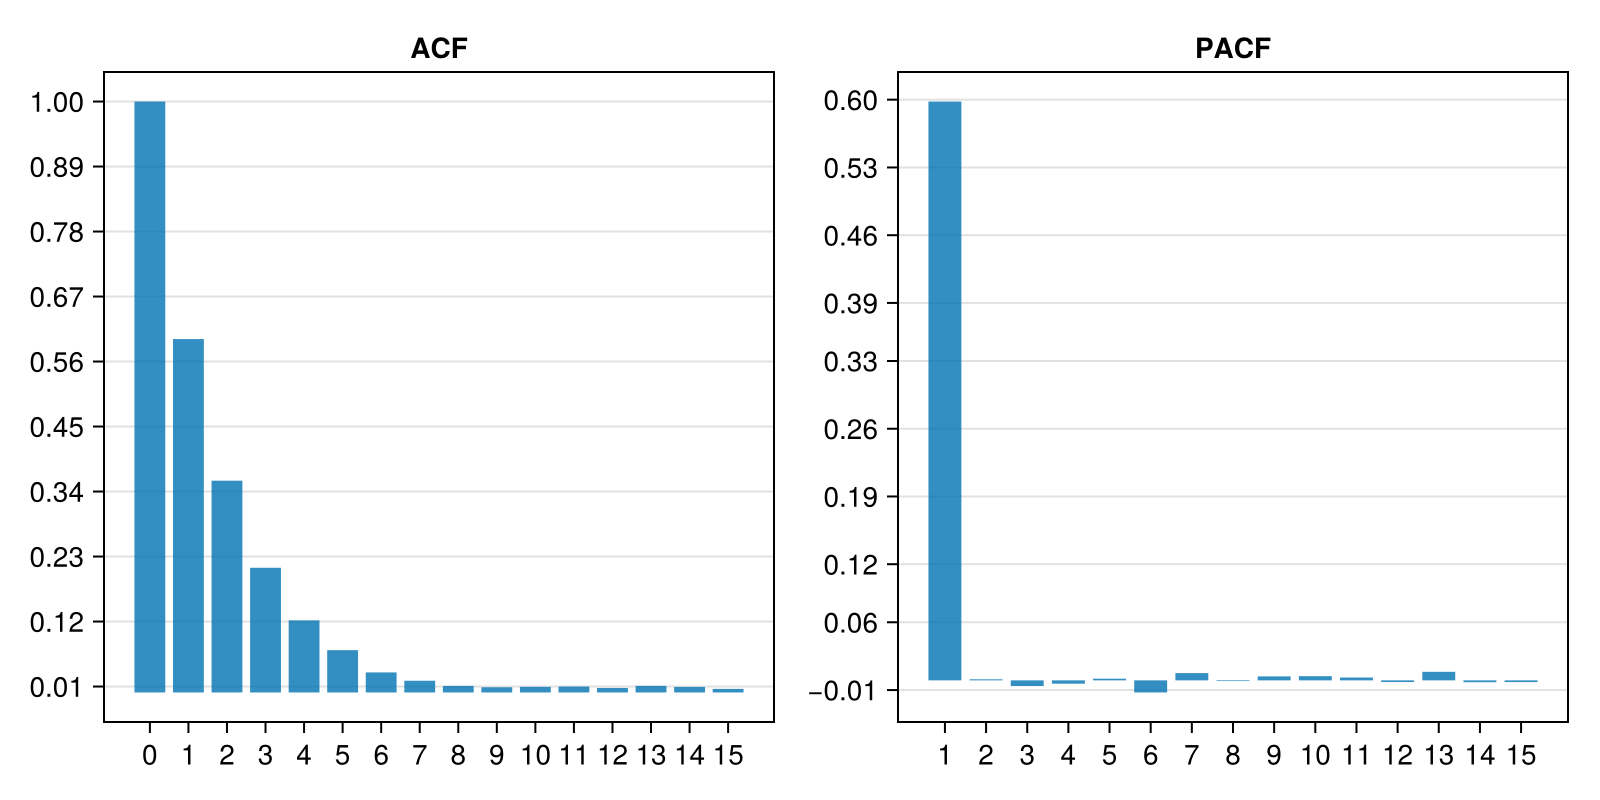

In [8]:
include("utils/ACF_PACF.jl")
ACF_PACF(x)

In [11]:
include("utils/Estimation.jl")
Parameters_est=LL_AR_Estimation(x,1)
Φ_hat,  σ_hat=Parameters_est[1][1], Parameters_est[2]
table = DataFrame("Parameters"=>"Φ", "Error"=>abs(Φ_hat-Φ), "Relative error"=>abs(Φ_hat-Φ)/abs(Φ))
push!(table,("σ",abs(σ_hat-σ),abs(σ_hat-σ)/abs(σ)))

Row,Parameters,Error,Relative error
,String,Float64,Float64
1,Φ,0.00177725,0.00296209
2,σ,0.00342489,0.000570816


# AR model on each month

Parameters for each month

In [12]:
Φ_month=[5,-7,2,7,-2,7,-5,6,3,1,4,-2] / 10
σ_month=[1.5,2,4.5,7,8,3,4.5,1,7,2.5,3,6]

12-element Vector{Float64}:
 1.5
 2.0
 4.5
 7.0
 8.0
 3.0
 4.5
 1.0
 7.0
 2.5
 3.0
 6.0

Generation of the series associated

In [13]:
n_month=200
x=SimulateMonth(4.,Date(2000,11,1),Φ_month,σ_month,n_month)
Date_vec=collect(Date(2000,11,1):(Date(2000,11,1) + Month(n_month) - Day(1)))
Monthly_temp=MonthlySeparateX(x,Date_vec)

12-element Vector{Vector{Any}}:
 [[2.952776635238686, 2.158743244992256, 1.2741335474432556, -0.8692113180072265, 1.6922223691122777, 2.2629351002606213, 1.7875007713318931, 1.3548774393173426, -0.13179811773204497, -0.792307898568628  …  -1.5442462412649753, -0.7628349258297294, -0.23705205262724682, -0.06297826732873071, 0.2590674006354164, -0.3345265022387175, -0.060794522729900324, -1.236319668100319, -1.5211611311461046, -0.20751160153529857], [1.941682801398716, 3.196477185720788, 2.117675886191903, 1.1195992676261235, -1.0370424163830625, -1.5768351957846596, 1.2172477652054372, 0.41467560703419626, 1.2668888169951358, 1.771806286664474  …  0.4320953451775833, 0.7507081675302147, -0.16092149283167057, -1.1098983269348417, 0.9405807261967152, 0.6076984417200135, -0.87132134700731, -0.3933629591790256, 0.6476310850237906, -0.5139648285604526], [1.482606167825408, -0.3698236021053015, -1.5913622193456076, 2.2858074887572704, -1.8805317792144893, -4.603637489512628, -4.3553550050779

## Autocorrelations

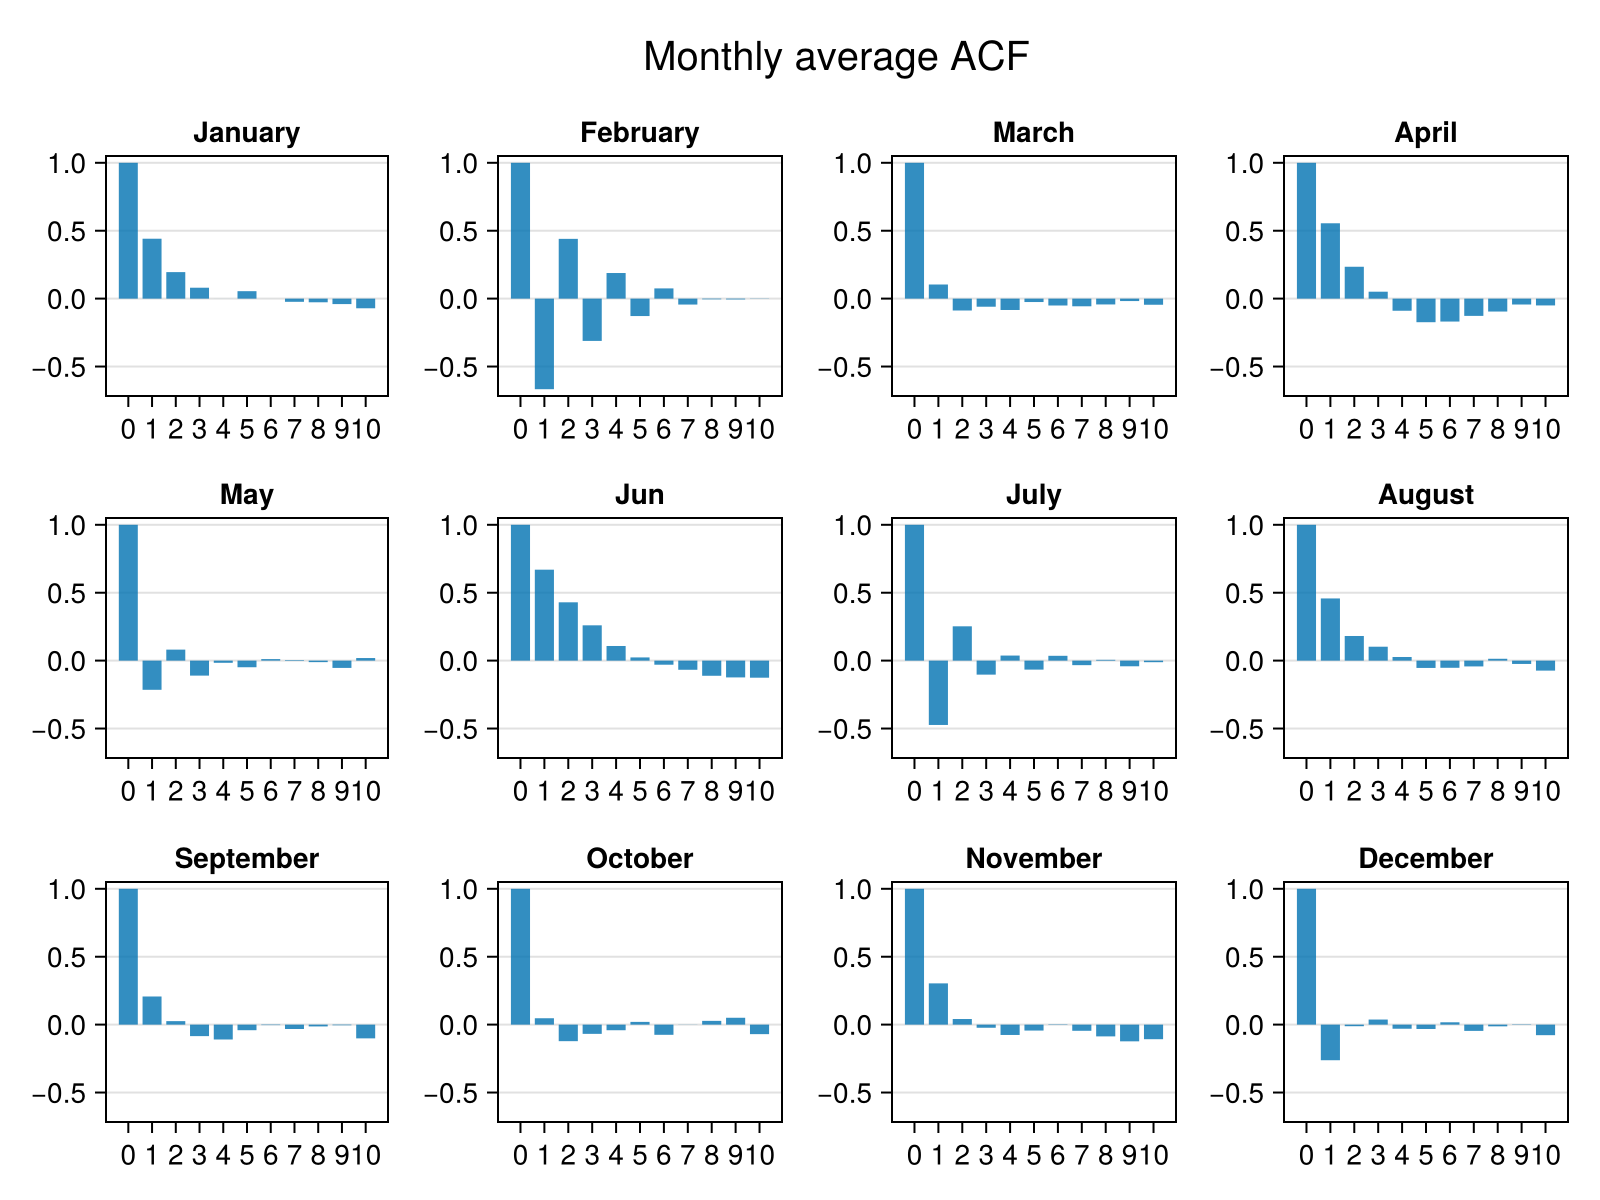

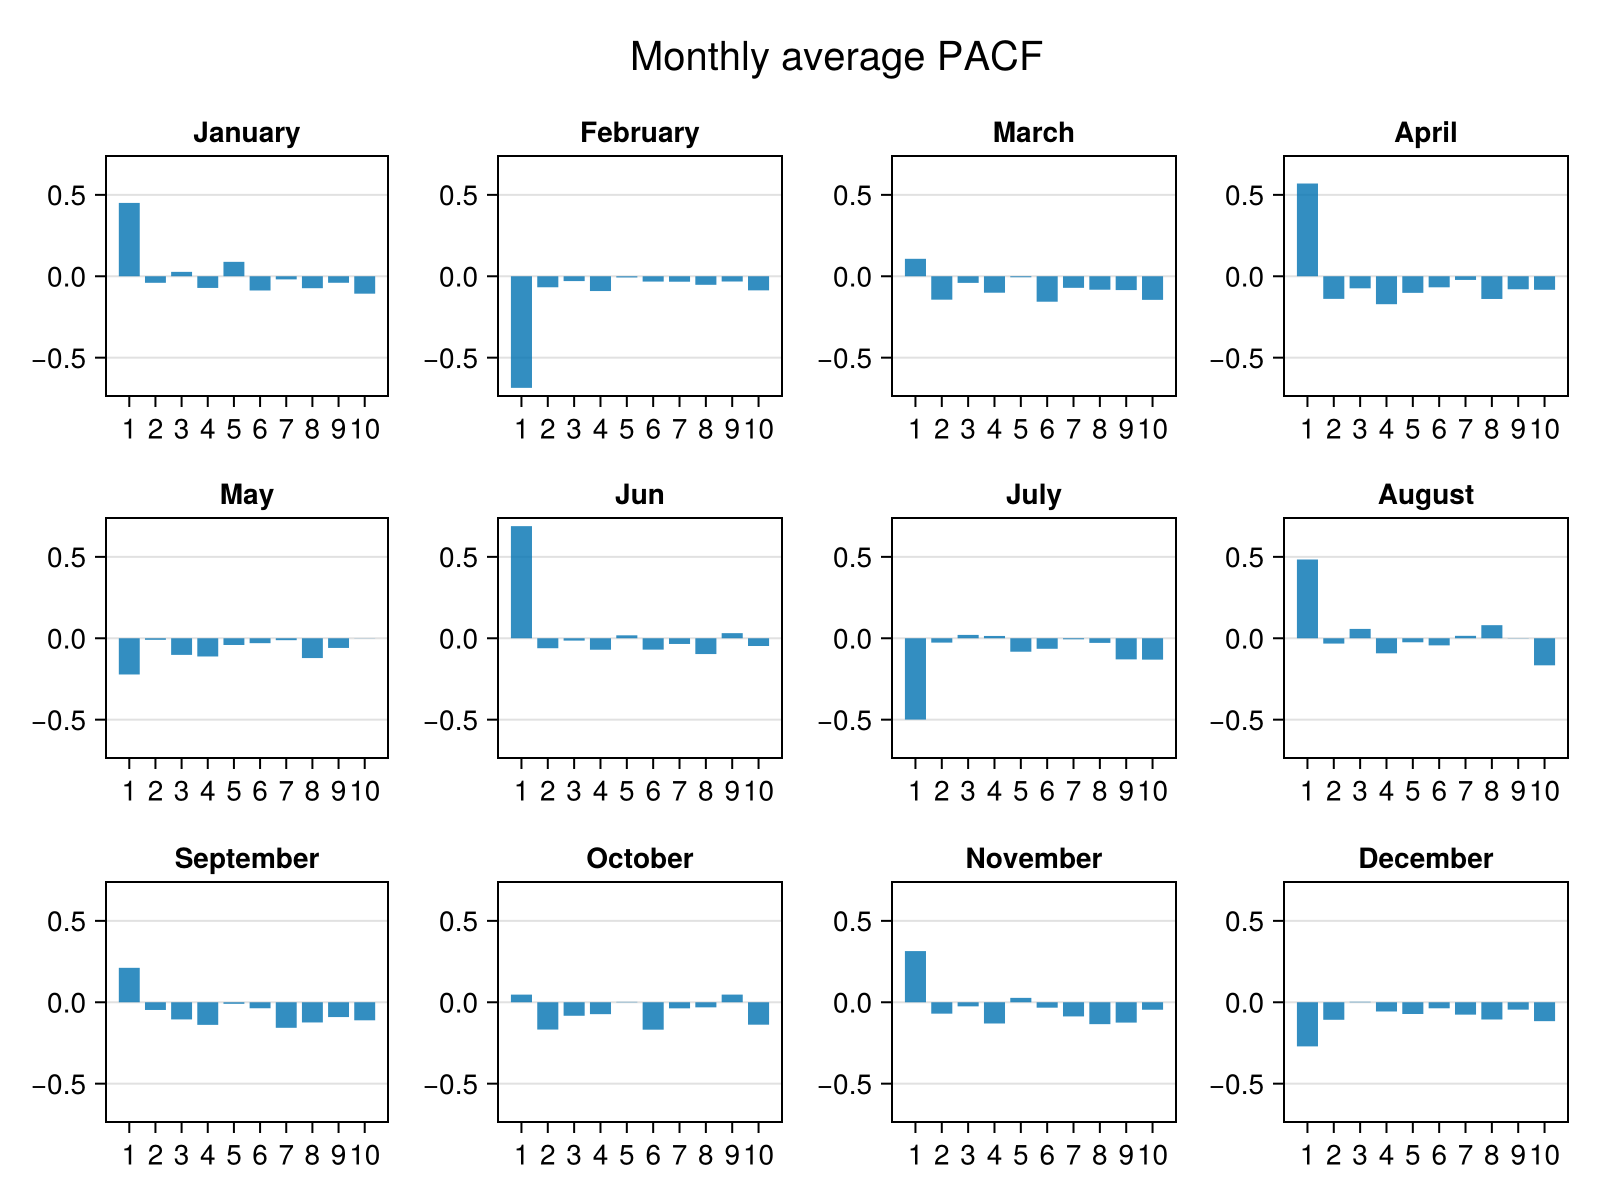

CairoMakie.Screen{IMAGE}


In [14]:
display(MonthlyACF(Monthly_temp))
display(MonthlyPACF(Monthly_temp))

## Estimating models

[[0.48599167728882087, 0.5689286609935085, 0.4979110519197992, 0.37434871641445266, 0.5303443729094918, 0.7201280349379313, 0.4389633044305743, 0.2466823594392738, 0.7198120056252437, 0.24707384106335398, 0.42155832314865027, 0.6380709045338638, 0.5442487138752468, 0.5149611207887913, 0.17138704360475587, 0.6749265200219494, 0.2976728487826201], [-0.7571043860571814, -0.686285389194752, -0.6837704028722439, -0.7020024808927223, -0.9147541652160676, -0.634804836435857, -0.6443763543989985, -0.5420069582144031, -0.9036303663189941, -0.8228080818839163, -0.06756902740619573, -0.862329035885639, -0.6923936752198814, -0.6179105406863061, -0.5395895231207685, -0.5891171659294687, -0.6406238764771653], [0.29487876455982054, -0.07615915605965815, -0.039923635614294906, 0.0013367943757079304, 0.19077518146417966, 0.2803178740112724, 0.10296881985595936, 0.4150845328955196, 0.44185563694693236, 0.03730713904748238, 0.13953462271334394, 0.14432733510988632, 0.41166962112701355, 0.2345001696567992

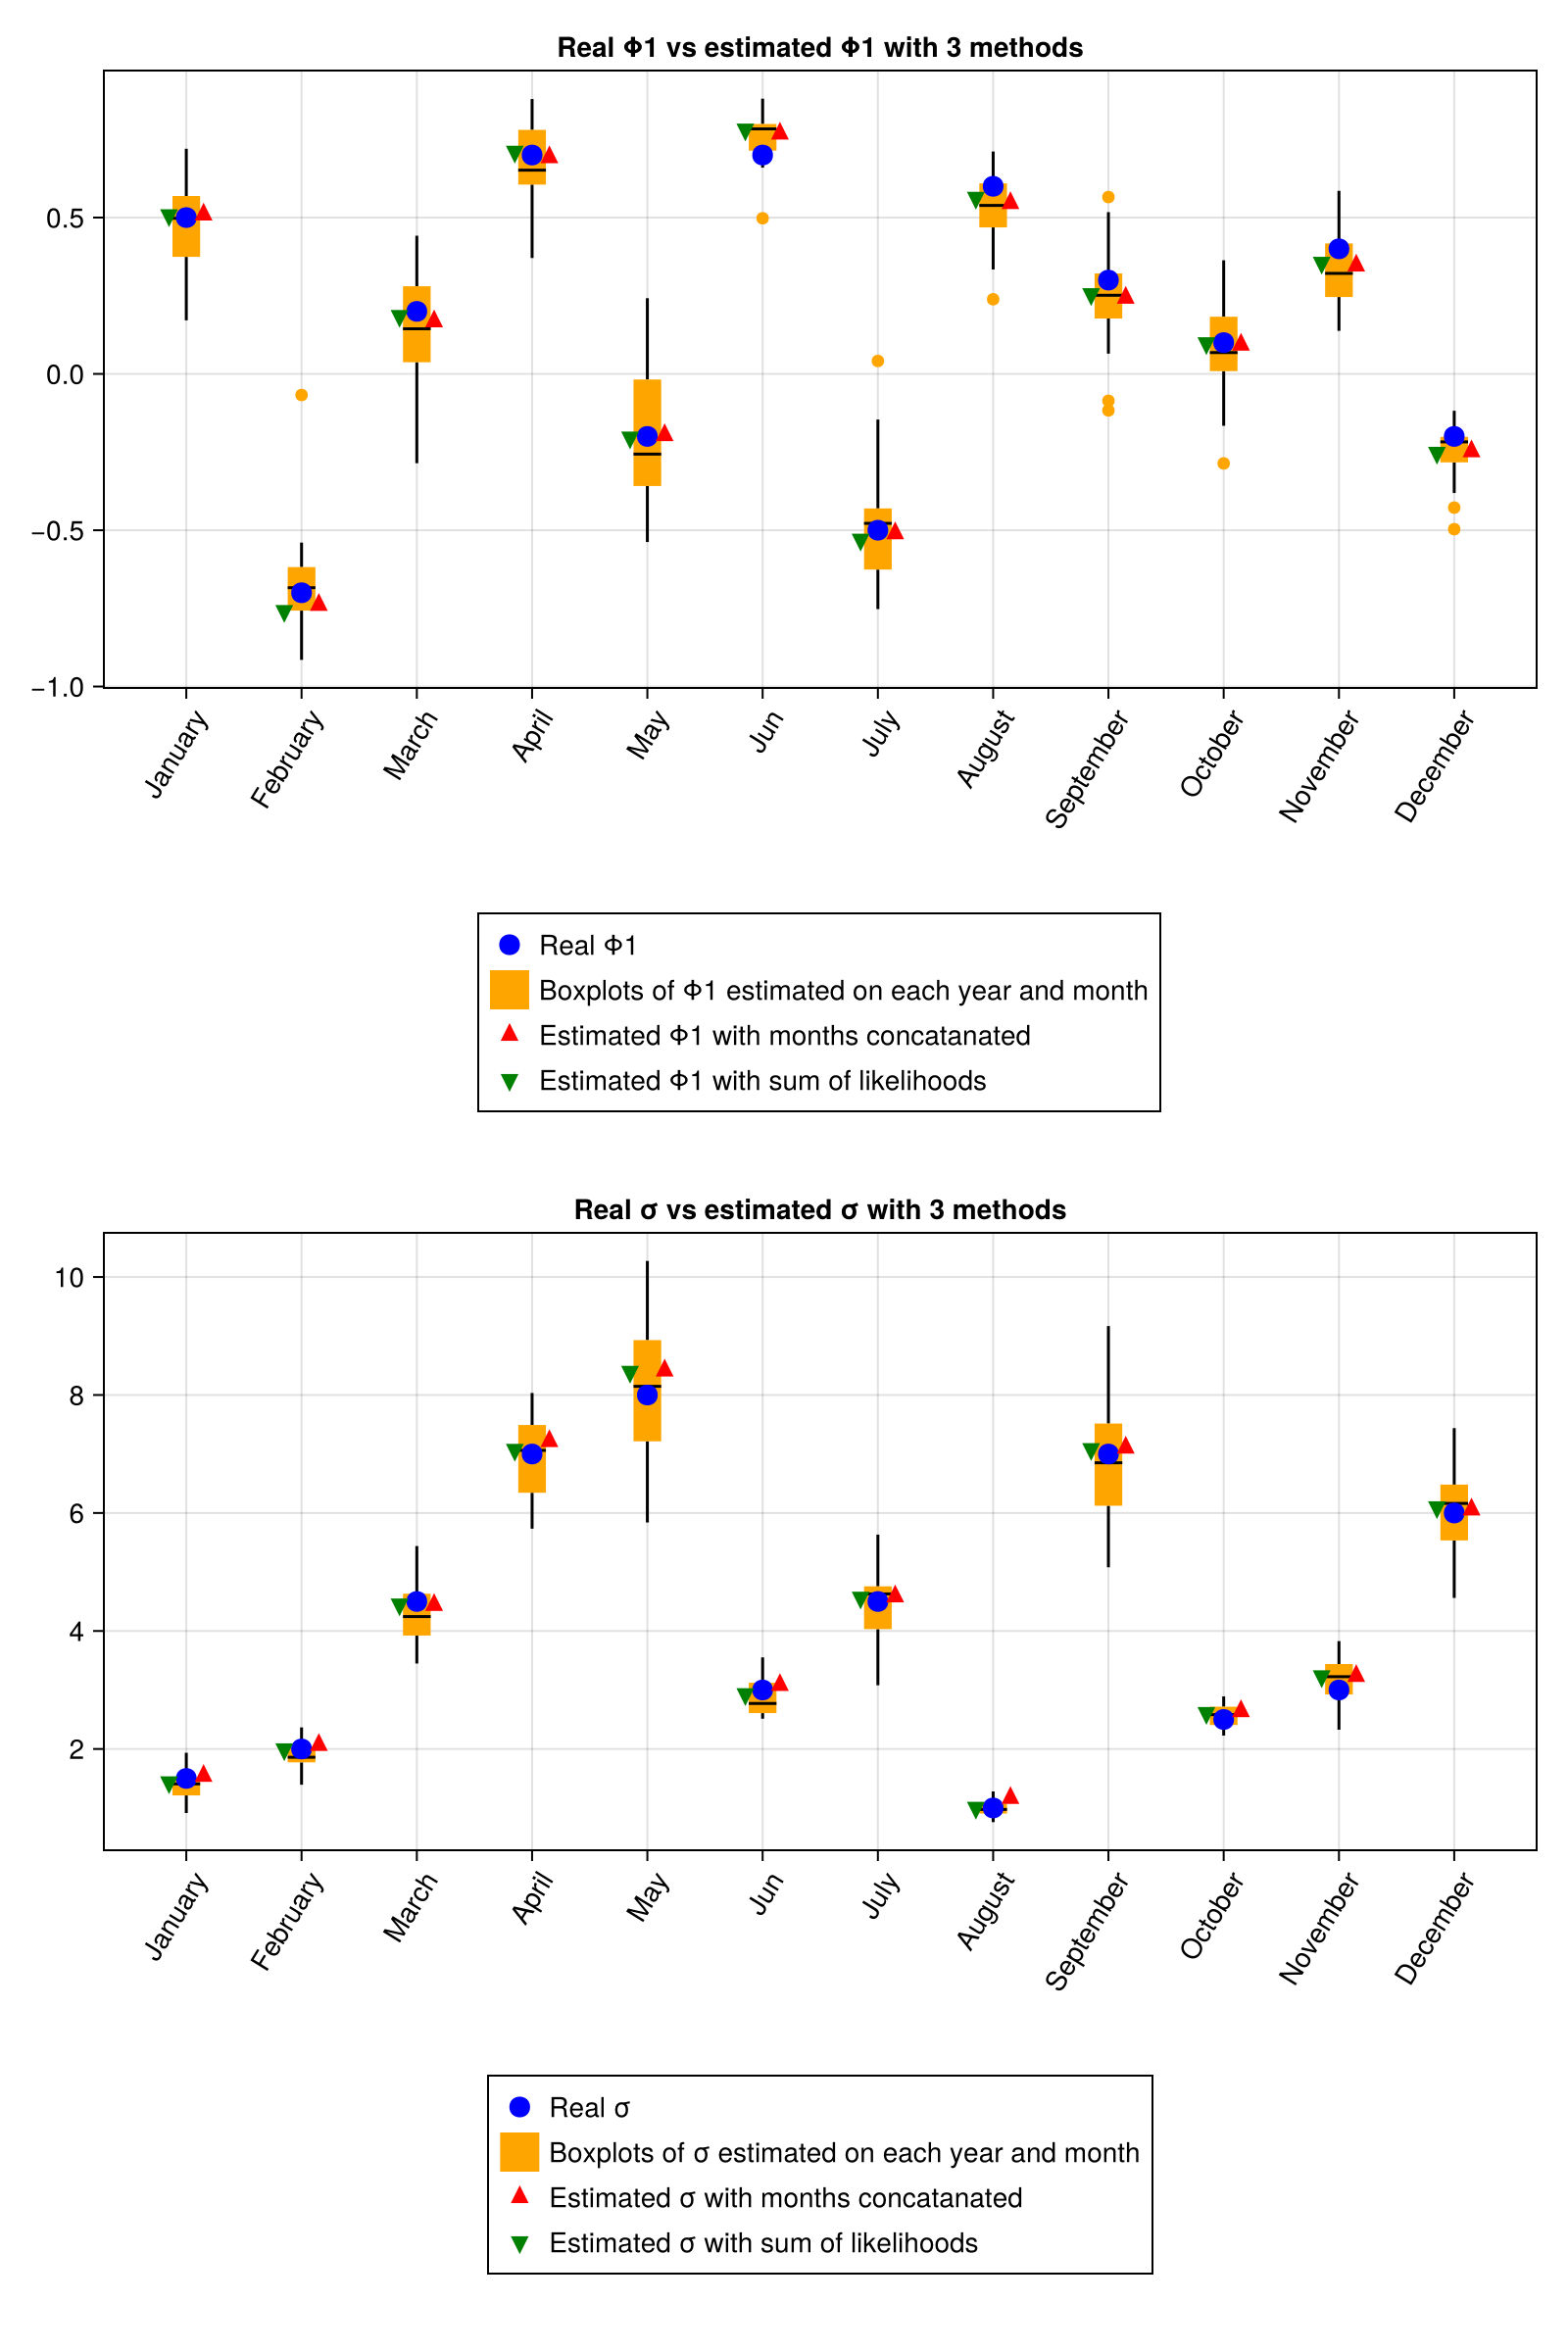

Row,Parameter,Month concatanation,Sum LL,mean of monthly parameters,median of monthly parameters
,String,Float64,Float64,Float64,Float64
1,Φ1,9.16061,8.18126,11.7147,14.0504
2,σ,4.46312,2.56419,3.00933,4.17388


In [17]:
include(raw"utils\Estimation.jl")
Parameters,autofig,PercentageErrorTable=AllEstimation(x,1,Date_vec=Date_vec,TrueParamVec=[Φ_month,σ_month])
display(autofig)
display(PercentageErrorTable)

In [18]:
Φ_vec, σ_vec = AutoTakeParameters((Parameters,PercentageErrorTable))
n_years=100
sim=SimulateYears([4.],Date(2001,1,1),Φ_vec, σ_vec,n_years)
sample_=invert(sim)

365-element Vector{Vector{Float64}}:
 [4.0, -2.5226538997695407, -0.4153002575659791, -3.1998744642878996, -5.062632219766969, 4.493059748587838, -0.1347622785277831, 4.3627776981939395, 2.773399757636299, -3.465907433038879  …  0.4471067249802907, 0.846058849515283, -5.722479286479849, 1.4038405492043504, -0.6303567041991974, 4.033705095334304, -5.692683188542524, -3.400811247117225, -1.447674288198875, 2.463963583645876]
 [2.3409801476901957, -2.261714427360661, -2.5179227476043593, 2.07664217136044, -2.186122236497479, 1.699116596963113, -0.7434744646806558, 2.3896462931539757, 0.5766920489362364, -1.509765978458315  …  -2.052484978506432, 1.4754273433516616, -3.5583388786235433, -0.3436440134401493, 1.5628931477075751, 1.5473280234006839, -0.00922679014304073, -0.7969457932835664, -4.1393672117184845, 0.6692599279529137]
 [2.1760071355181836, 0.7922346461004379, 0.8073321756261636, -0.3470514629704309, 1.8510215278871733, -0.1530103762349121, 0.02671636872127847, 1.6374297403318392

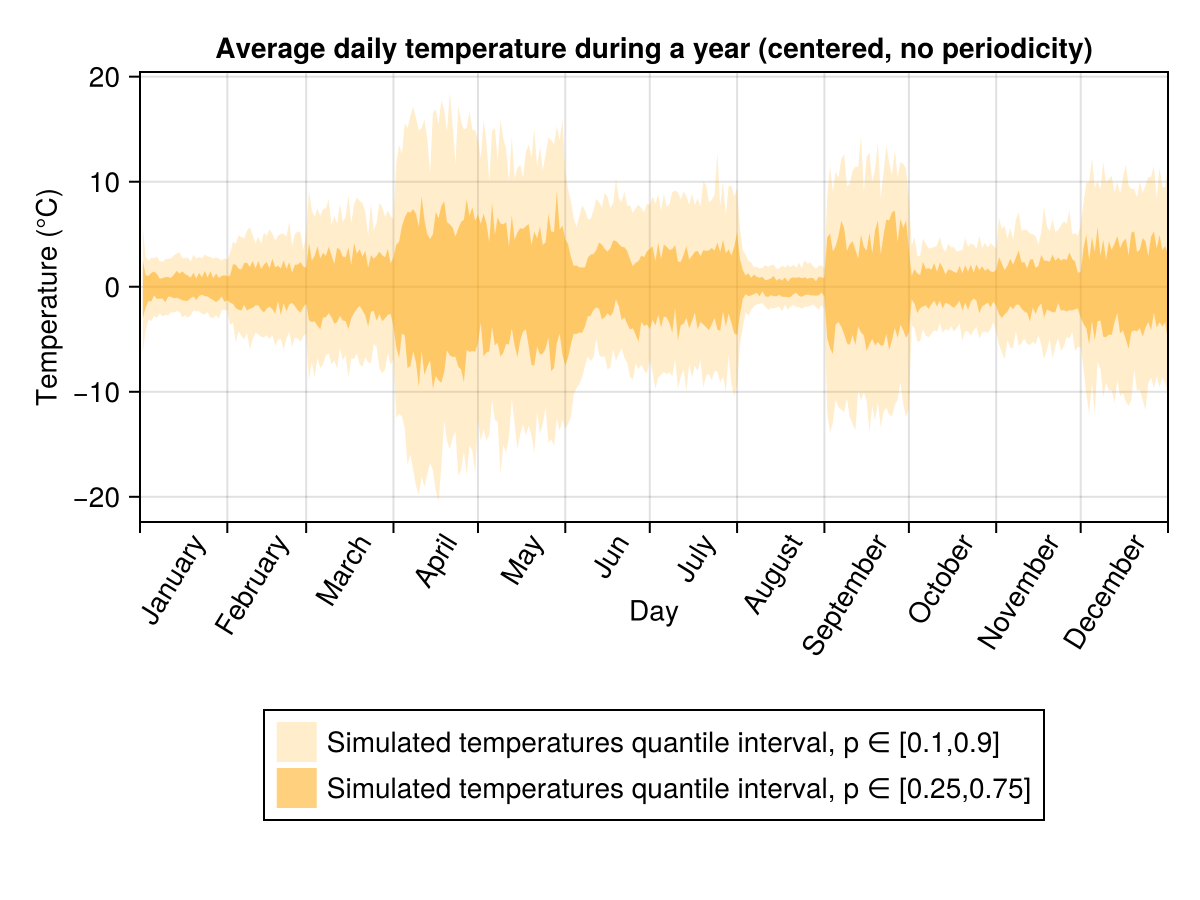

In [19]:
include("utils/Plotting.jl")
PlotYearCurves([],
["Simulated temperatures quantile interval, p ∈ [0.1,0.9]","Simulated temperatures quantile interval, p ∈ [0.25,0.75]"],
"Average daily temperature during a year (centered, no periodicity)",
[(quantile.(sample_,0.05),quantile.(sample_,0.95)),(quantile.(sample_,0.25),quantile.(sample_,0.75))],
[("orange",0.2),("orange",0.5)]
)